<div class="alert alert-block alert-success">
    <b>ARTIFICIAL INTELLIGENCE (E016350)</b> <br>
ALEKSANDRA PIZURICA <br>
GHENT UNIVERSITY <br>
AY 2024/2025 <br>
Assistants: Xianlu Li and Nicolas Vercheval
</div>

## Introduction to Clustering Tutorial

In this tutorial, we'll explore the basics of clustering, a powerful unsupervised machine learning technique that allows us to discover groups within our data. We will begin by loading our dataset, then explain the main principle behind some of the best known clustering methods, showing practical implementation in Python and draw insights from the clustering results.

In [1]:
import sklearn
import numpy as np
import matplotlib.pyplot as plt

### Dataset

- **Convex clusters**: Use the `make_blobs` dataset. It generates clusters around multiple center points, forming convex structures, meaning that you can draw a straight line from any point in the cluster to any other point in the cluster without leaving the cluster. These type of data are ideal for illustrating simple clustering scenarios where clusters are well-separated and blob-like.
- **Non-Convex clusters**: Use the `make_moons` dataset. It generates two crescent-shaped clusters, illustrating non-convex structures, which are useful for showcasing clustering scenarios involving more complex shapes.


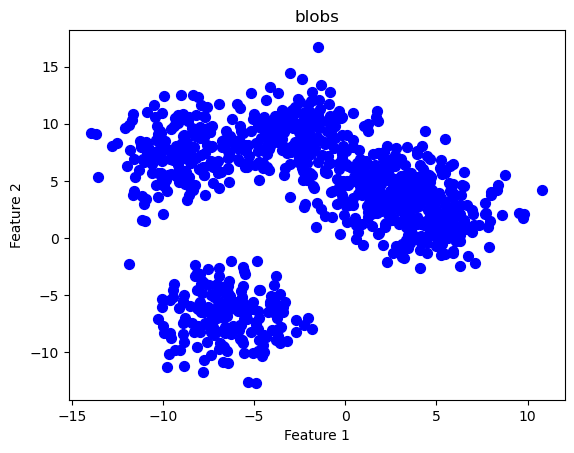

In [2]:
# Generate convex dataset (make_blobs)
from sklearn.datasets import make_blobs
X_blobs, y_blobs = make_blobs(n_samples=1000, centers=5, cluster_std=2.0, random_state=42)

# Visualize make_blobs dataset
plt.scatter(X_blobs[:, 0], X_blobs[:, 1], color='b', s=50)

plt.title("blobs")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


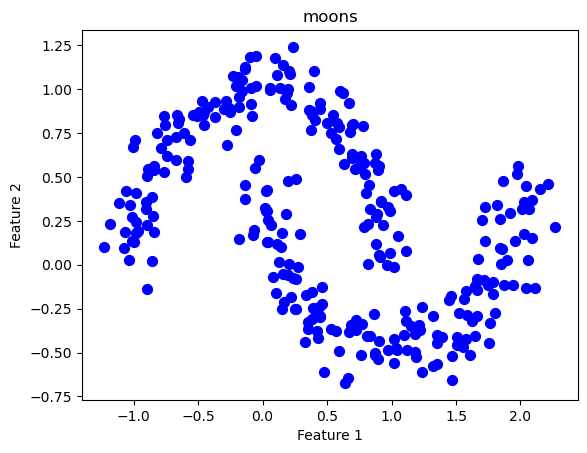

In [3]:
# Generate non-convex dataset (make_moons)
X_moons, y_moons = sklearn.datasets.make_moons(n_samples=300, noise=0.10, random_state=42)

# Visualize make_moons dataset
plt.scatter(X_moons[:, 0], X_moons[:, 1], color='b', s=50)
plt.title("moons")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


### Clustering Methods Overview

-**K-Means, Agglomerative Hierarchical Clustering:**
These methods require specifying the number of clusters (k) in advance. The correct choice of k is often ambiguous, depending on the data distribution and the desired clustering resolution. Increasing k reduces clustering error, potentially to zero if each data point is its own cluster(k = n). Thus, the optimal k balances between summarizing the data with fewer clusters and capturing detailed patterns by assigning each data point to its own cluster. In some cases, the number of clusters is known in advance. For example, classifying pixels in a remote sensing scene into urban areas, roads, vegetation and water, categorizing customers into high and low income values, or classifying disease samples into mild, moderate, and severe.

-**DBSCAN:**
DBSCAN does not require specifying the number of clusters. It identifies clusters based on data density, effectively handling clusters of various shapes and detecting outliers.



#### 1. K-Means Clustering

The **K-Means algorithm** initialises the cluster centroids randomly and then alternates until convergence two steps:
- assign each data point to its nearest centroid based on the Euclidean distance;
- Recalculate the centroids based on the updated assignments.

##### Important Hyperparameters

- **`n_clusters`**: Specifies the number of clusters to form. Choosing this value carefully is crucial for achieving good clustering results.


**Blobs dataset**

In [4]:
from sklearn.cluster import KMeans
import time

# Apply kMeans
start = time.time()
kmeans = KMeans(n_clusters=5, random_state=42)
y_kmeans = kmeans.fit_predict(X_blobs)
end=time.time()
print(f"Running time: {end - start:.4f} seconds")


Running time: 0.0438 seconds


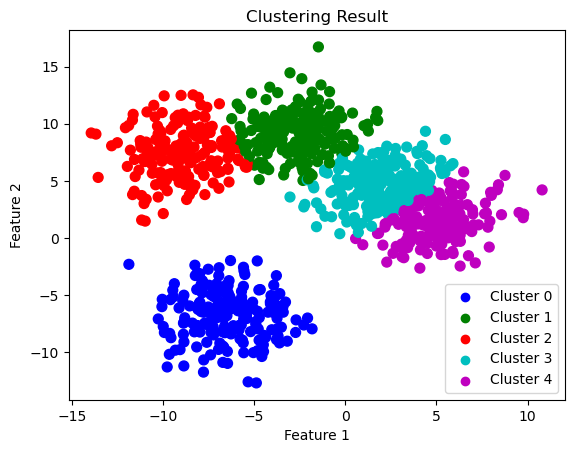

In [5]:
# visualize clustering result
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'orange', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan', 'magenta']

def vis(X, y_predict):
    
    
    # get the number of clusters
    num_clusters = len(np.unique(y_predict))
    
    if num_clusters>len(colors):
        print("number of clusters:", num_clusters)
        return -1
    
    # define color map
    cluster_colors = colors[:num_clusters] 
    color_map = np.array(cluster_colors)[y_predict]
    
    # draw clustering result
    plt.scatter(X[:, 0], X[:, 1], color=color_map, s=50)
    
    for i in range(num_clusters):
        plt.scatter([], [], color=cluster_colors[i], label=f'Cluster {i}')
        
    plt.legend()
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Clustering Result')
    plt.show()

vis(X_blobs,y_kmeans)


**Increase the number of clusters to 8**

Running time: 0.0121 seconds


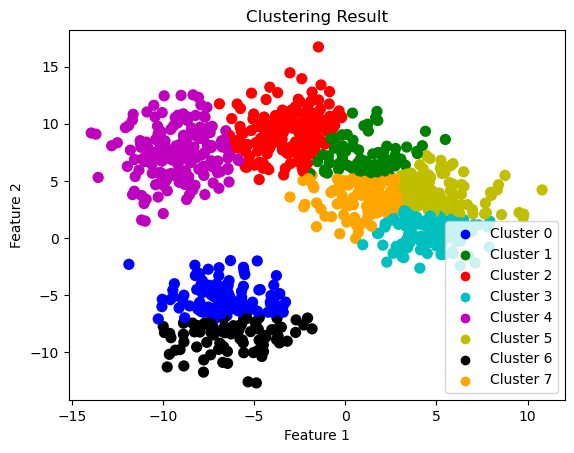

In [6]:
import time
start = time.time()
kmeans = KMeans(n_clusters=8, random_state=42)
y_kmeans = kmeans.fit_predict(X_blobs)
end = time.time()
print(f"Running time: {end - start:.4f} seconds")
vis(X_blobs,y_kmeans)

**Decrease the number of clusters to 2**

Running time: 0.0236 seconds


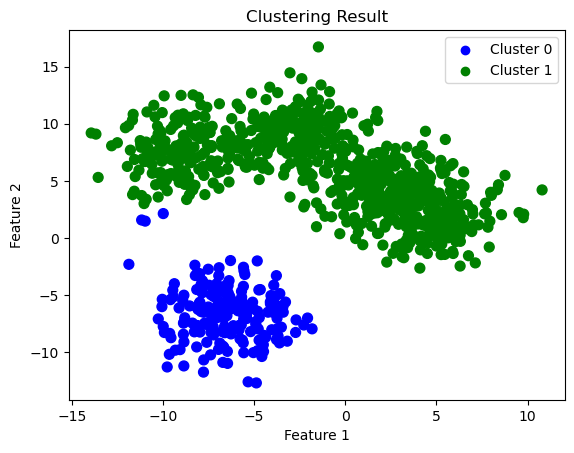

In [7]:
import time
start = time.time()
kmeans = KMeans(n_clusters=2, random_state=42)
y_kmeans = kmeans.fit_predict(X_blobs)
end = time.time()
print(f"Running time: {end - start:.4f} seconds")
vis(X_blobs,y_kmeans)

K-Means clustering results are highly sensitive to the choice of the number of clusters. Different cluster numbers lead to significant changes in the number and shape of clusters, affecting the distribution and compactness of each cluster. With fewer clusters, the results tend to be broader, grouping many points into the same cluster. As the number of clusters increases, points within clusters become more similar, and the clustering becomes more refined.

**Moons dataset**

Running time: 0.0032 seconds


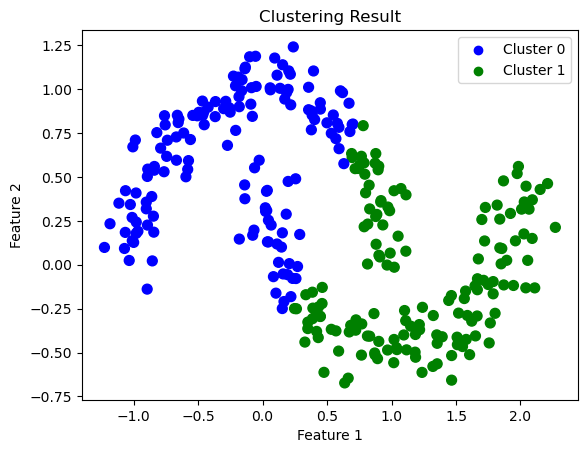

In [8]:
# Apply KMeans clustering
start = time.time()
kmeans = KMeans(n_clusters=2, random_state=42)
y_kmeans = kmeans.fit_predict(X_moons)
end = time.time()
print(f"Running time: {end - start:.4f} seconds")
vis(X_moons, y_kmeans)

For datasets with complex structures, K-Means has difficulty identifying the underlying data patterns. As shown in the figure, the two clusters exhibit a clear **nonlinear boundary**, which K-Means struggles to accurately capture, resulting in clustering outcomes that do not align well with the actual cluster shapes.

### 2. DBSCAN (Density-Based Spatial Clustering of Applications with Noise

The **DBSCAN (Density-Based Spatial Clustering of Applications with Noise)** algorithm is a density-based clustering algorithm. It groups together points that are closely packed and marks points in low-density areas as outliers. DBSCAN does not require you to specify the number of clusters in advance, making it well-suited for datasets with complex cluster shapes.

##### Important Hyperparameters
- **`eps`**: The maximum distance between two samples for one to be considered as in the neighborhood of the other. This value determines how close points need to be to each other to be grouped into a cluster. Choosing an appropriate `eps` is crucial, as higher `eps` indicates lower density necessary to form a cluster, while lower `eps` requires higher density.

- **`min_samples`**: The minimum number of points required to form a dense region. Higher `min_samples` indicates higher density necessary to form a cluster, as more points are required to establish density.

**Blobs dataset**

Running time: 0.0085 seconds


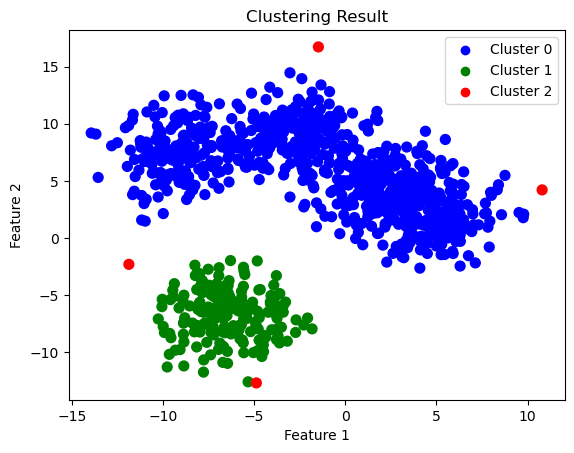

In [9]:
from sklearn.cluster import DBSCAN
# Apply DBSCAN clustering
start = time.time()
dbscan = DBSCAN(eps=2.0, min_samples=10)
y_dbscan = dbscan.fit_predict(X_blobs)
end=time.time()
print(f"Running time: {end - start:.4f} seconds")
vis(X_blobs, y_dbscan)

DBSCAN can effectively detect high-density areas but struggles to cluster noise points(red points). 

#### **Increase the `eps` to 4.0**

Running time: 0.0085 seconds


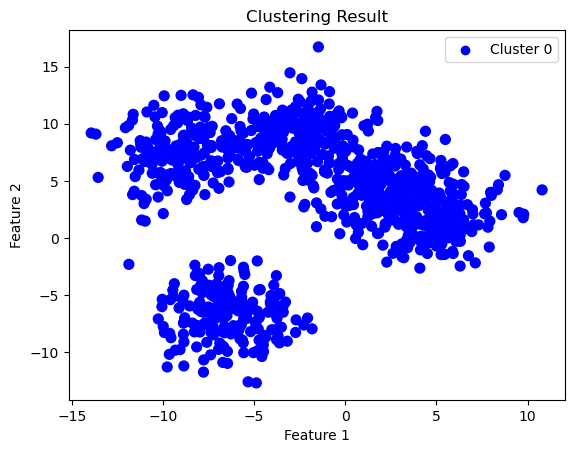

In [10]:
start = time.time()
# with larger eps
dbscan = DBSCAN(eps=4.0, min_samples=10)
y_dbscan = dbscan.fit_predict(X_blobs)
end = time.time()
print(f"Running time: {end - start:.4f} seconds")
vis(X_blobs, y_dbscan)


A large `eps` value will merge clusters together, bring low density.

#### **Decrease the `eps` to 1.0**

Running time: 0.0047 seconds


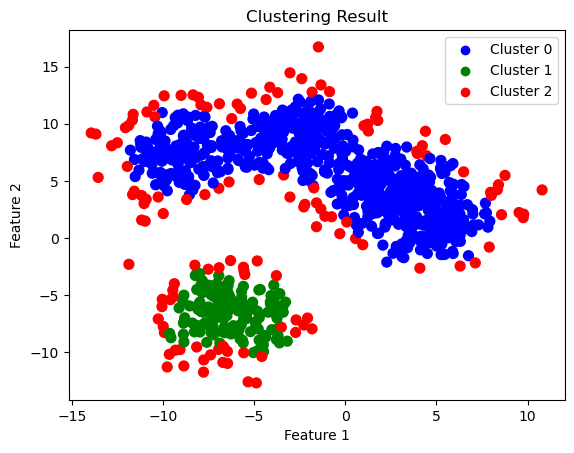

In [11]:
start = time.time()
# with smaller eps
dbscan = DBSCAN(eps=1.0, min_samples=10)
y_dbscan = dbscan.fit_predict(X_blobs)
end = time.time()
print(f"Running time: {end - start:.4f} seconds")
vis(X_blobs, y_dbscan)

A small `eps` value will increase the density, more data points be treated as noise points(red points).

#### **Increase the `min_samples` to 20**

Running time: 0.0061 seconds


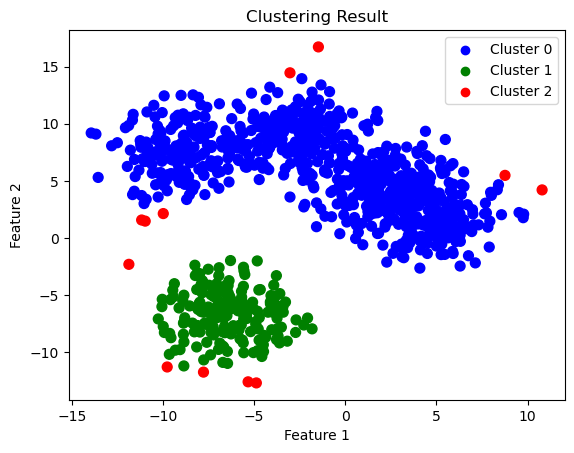

In [12]:
start = time.time()
# with more samples
dbscan = DBSCAN(eps=2.0, min_samples=20)
y_dbscan = dbscan.fit_predict(X_blobs)
end = time.time()
print(f"Running time: {end - start:.4f} seconds")
vis(X_blobs, y_dbscan)

A large `min_samples` value could increase the density, as more points are treated as noise points(red points).

#### **Decrease the `min_samples` to 2**

Running time: 0.0083 seconds


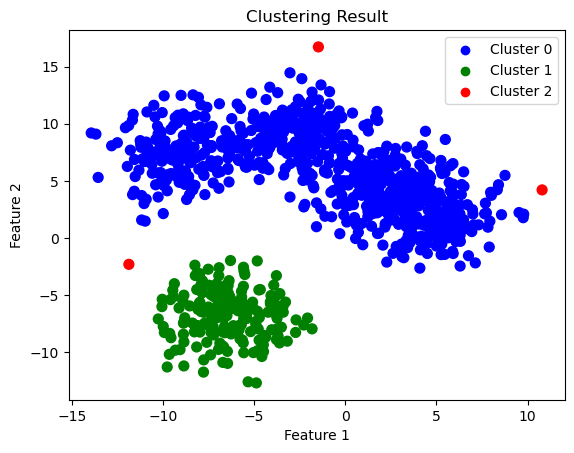

In [13]:
start = time.time()
# with less samples
dbscan = DBSCAN(eps=2.0, min_samples=2)
y_dbscan = dbscan.fit_predict(X_blobs)
end = time.time()
print(f"Running time: {end - start:.4f} seconds")
vis(X_blobs, y_dbscan)

A small `min_samples` value will decrease the density, as less points are treated as noise points(red points).

**Moons dataset**

Running time: 0.0025 seconds


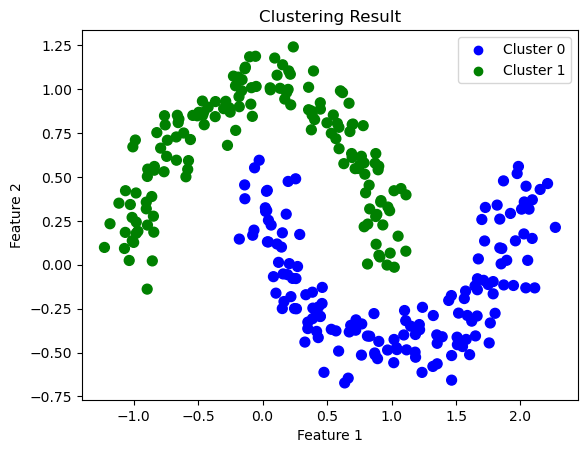

In [14]:
start = time.time()
from sklearn.cluster import DBSCAN

# Apply DBSCAN clustering
dbscan = DBSCAN(eps=0.2, min_samples=5)
y_dbscan = dbscan.fit_predict(X_moons)
end = time.time()
print(f"Running time: {end - start:.4f} seconds")
vis(X_moons, y_dbscan)

DBSCAN makes no assumptions about the data's structure or shape, which might perform well on data with complex structures.

#### 3. Agglomerative Hierarchical Clustering

The **Agglomerative Hierarchical Clustering** algorithm is a type of hierarchical clustering that builds a hierarchy of clusters by iteratively merging smaller clusters into larger ones. It is a bottom-up approach, meaning that each data point starts as its own individual cluster, and clusters are merged step by step based on a chosen linkage criterion until a stopping condition is met, typically when the desired number of clusters is achieved.

##### Important Hyperparameters
- **`n_clusters`**: Specifies the number of clusters to form. This parameter is important to determine the stopping point of the hierarchical merging process.

- **`linkage`**: Determines which linkage criterion to use when merging clusters. Options include:
  - **`ward`**: This is the default and tends to produce clusters of relatively equal sizes by minimizing the within-cluster variance.
  - **`complete`**: Uses the maximum distance between points in different clusters, aiming for compact clusters.
  - **`average`**: Uses the average distance between points in different clusters, balancing compactness and connection.
  - **`single`**: Uses the minimum distance between points in different clusters, often resulting in elongated clusters (also called chaining).


**Blobs dataset**

**Clustering with different linkage criterion**

Running time: 0.0277 seconds


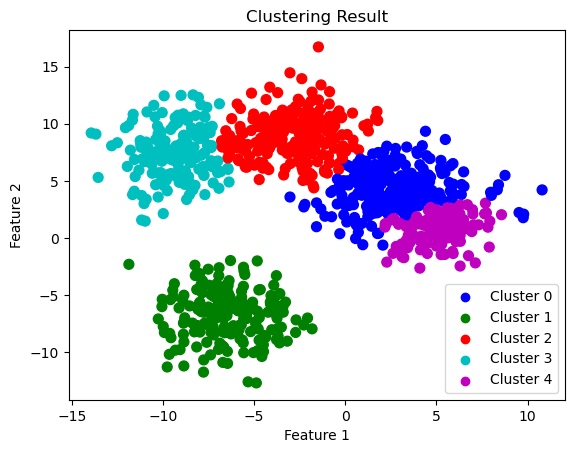

In [15]:
from sklearn.cluster import AgglomerativeClustering

# Apply Agglomerative Clustering
start = time.time()
agg_clustering = AgglomerativeClustering(n_clusters=5, linkage='ward')
y_agg = agg_clustering.fit_predict(X_blobs)
end=time.time()
print(f"Running time: {end - start:.4f} seconds")

vis(X_blobs, y_agg)

Running time: 0.0177 seconds


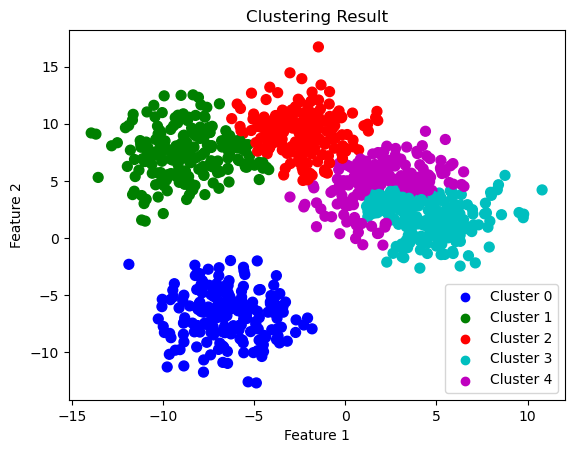

In [16]:
# Apply Agglomerative Clustering
start = time.time()
agg_clustering = AgglomerativeClustering(n_clusters=5, linkage='complete')
y_agg = agg_clustering.fit_predict(X_blobs)
end=time.time()
print(f"Running time: {end - start:.4f} seconds")
vis(X_blobs, y_agg)

Running time: 0.0199 seconds


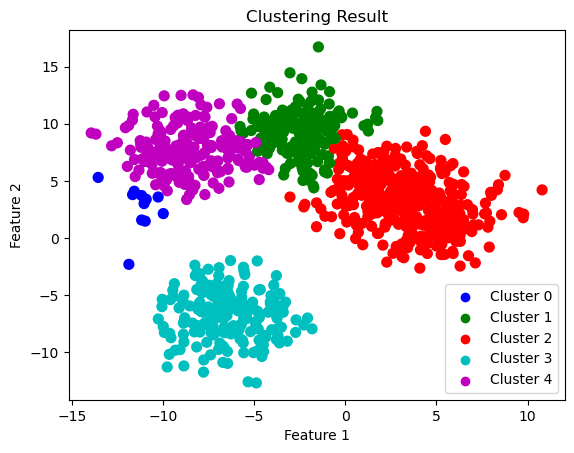

In [17]:
# Apply Agglomerative Clustering
start = time.time()
agg_clustering = AgglomerativeClustering(n_clusters=5, linkage='average')
y_agg = agg_clustering.fit_predict(X_blobs)
end=time.time()
print(f"Running time: {end - start:.4f} seconds")
vis(X_blobs, y_agg)

Running time: 0.0114 seconds


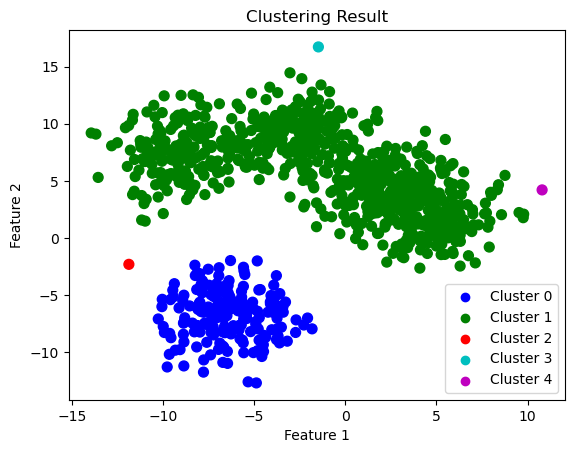

In [18]:
# Apply Agglomerative Clustering
start = time.time()
agg_clustering = AgglomerativeClustering(n_clusters=5, linkage='single')
y_agg = agg_clustering.fit_predict(X_blobs)
end=time.time()
print(f"Running time: {end - start:.4f} seconds")
vis(X_blobs, y_agg)

The linkage criterion can significantly affect clustering, as different choices may produce completely different results.

For convenience, we test the default linkage criterion `ward` with different numbers of clusters.

**Increase the number of clusters to 8**

Running time: 0.0192 seconds


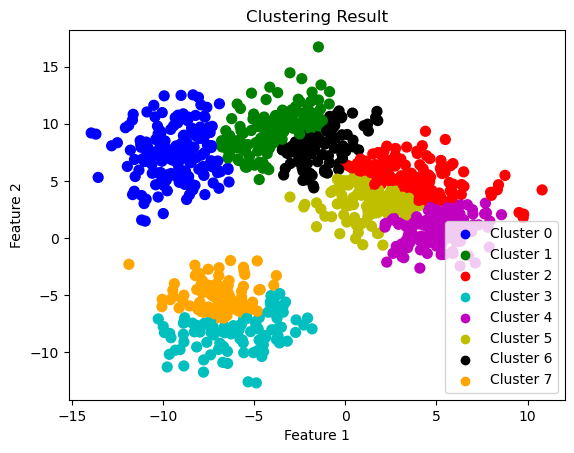

In [19]:
start = time.time()
agg_clustering = AgglomerativeClustering(n_clusters=8, linkage='ward')
y_agg = agg_clustering.fit_predict(X_blobs)
end = time.time()
print(f"Running time: {end - start:.4f} seconds")
vis(X_blobs, y_agg)

**Decrease the number of clusters to 2**

Running time: 0.02 seconds


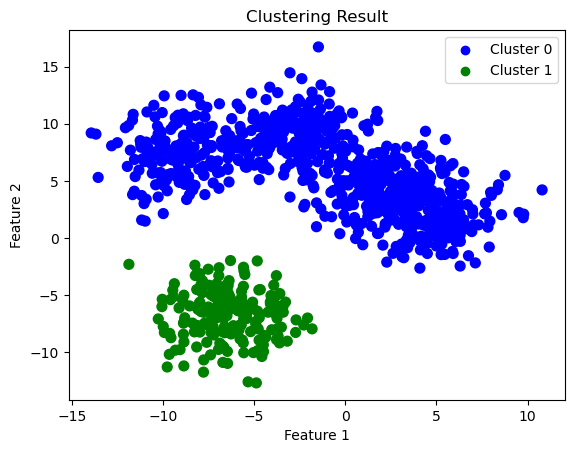

In [20]:
start = time.time()
# Apply Agglomerative Clustering
agg_clustering = AgglomerativeClustering(n_clusters=2, linkage='ward')
y_agg = agg_clustering.fit_predict(X_blobs)
end = time.time()
print(f"Running time: {end - start:.2f} seconds")
vis(X_blobs, y_agg)

It shows that the clustering method can effectively separate data into different numbers of clusters and also handles noise well.

**Moons dataset**

Running time: 0.0025 seconds


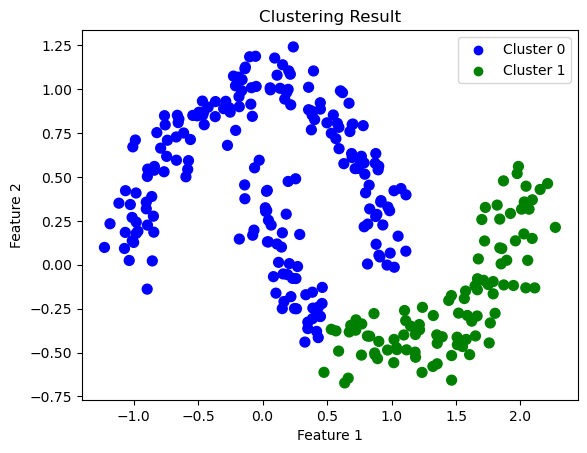

In [21]:
start = time.time()
# Apply Agglomerative Clustering
agg_clustering = AgglomerativeClustering(n_clusters=2, linkage='ward')
y_agg = agg_clustering.fit_predict(X_moons)
end = time.time()
print(f"Running time: {end - start:.4f} seconds")
vis(X_moons, y_agg)


Running time: 0.0031 seconds


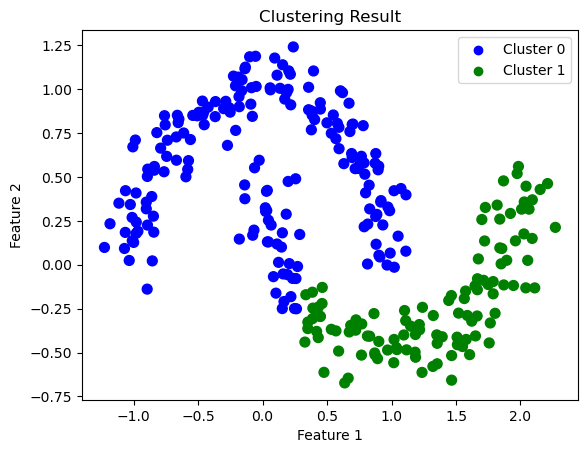

In [22]:
start = time.time()
# Apply Agglomerative Clustering
agg_clustering = AgglomerativeClustering(n_clusters=2, linkage='complete')
y_agg = agg_clustering.fit_predict(X_moons)
end = time.time()
print(f"Running time: {end - start:.4f} seconds")
vis(X_moons, y_agg)

Running time: 0.0025 seconds


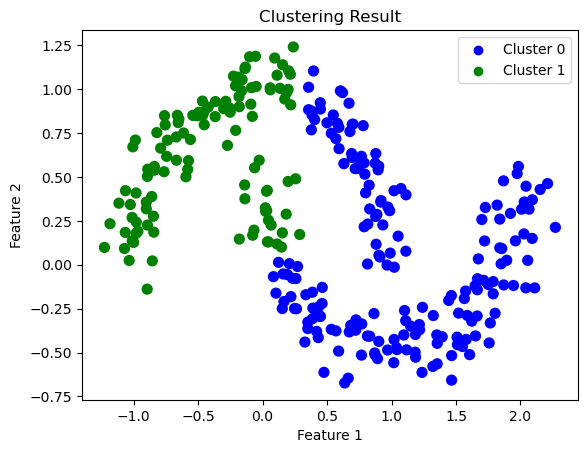

In [23]:
start = time.time()
# Apply Agglomerative Clustering
agg_clustering = AgglomerativeClustering(n_clusters=2, linkage='average')
y_agg = agg_clustering.fit_predict(X_moons)
end = time.time()
print(f"Running time: {end - start:.4f} seconds")
vis(X_moons, y_agg)



Running time: 0.0032 seconds


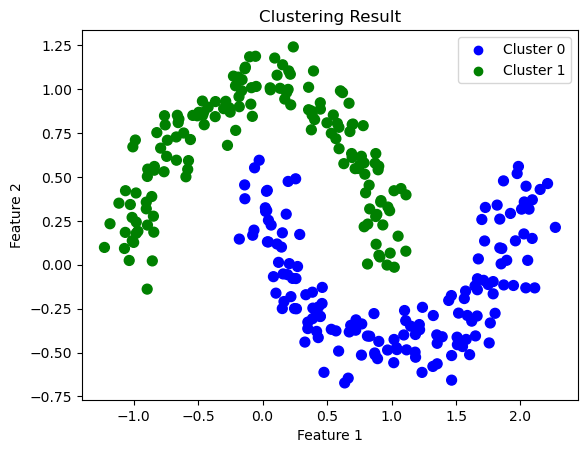

In [24]:
start = time.time()
# Apply Agglomerative Clustering
agg_clustering = AgglomerativeClustering(n_clusters=2, linkage='single')
y_agg = agg_clustering.fit_predict(X_moons)
end = time.time()
print(f"Running time: {end - start:.4f} seconds")
vis(X_moons, y_agg)


Agglomerative Hierarchical Clustering does not make any assumptions about the data structure or shape and can sometimes perform well on data with complex structures, depending on the chosen linkage criterion. As we can see, it perfectly recognizes the nonlinear boundary with the `single` linkage.

### Summary

In this tutorial, we covered four popular clustering algorithms:

1. **K-Means**: Effective for spherical, well-separated clusters, but sensitive to outliers and requires the number of clusters to be defined in advance.

2. **DBSCAN**: Finds clusters of arbitrary shapes, but requires careful tuning of `eps` and `min_samples` to achieve optimal results but hard to cluster noise points.

3. **Agglomerative Hierarchical Clustering**: Builds a hierarchy of clusters, and its performance can be varied by the chosen linkage criterion. However, it is computationally intensive.
